In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

dimension of X:  (100, 2)
dimension of y:  (100, 1)


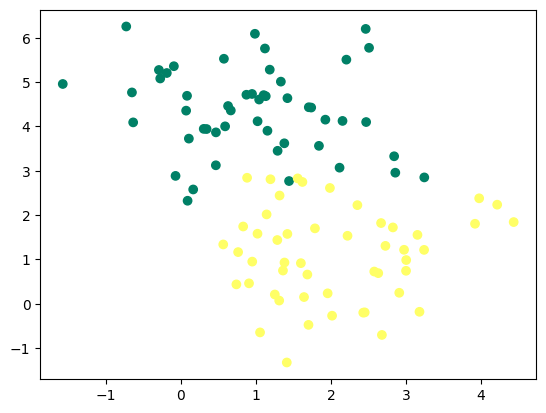

In [5]:
X,y=make_blobs(n_samples=100,n_features=2,centers=2,random_state=0)
y=y.reshape(y.shape[0],1)
print('dimension of X: ',X.shape)
print('dimension of y: ',y.shape)

plt.scatter(X[:,0],X[:,1],cmap='summer',c=y)
plt.show()

In [56]:
lim=10
h=100
w1=np.linspace(-lim,lim,h)
w2=np.linspace(-lim,lim,h)

w11,w22=np.meshgrid(w1,w2)
W_final=np.c_[w11.ravel(),w22.ravel()].T
print('dimension of w11: ',w11.shape)
print('dimension of w22: ',w22.shape)
W_final.shape

dimension of w11:  (100, 100)
dimension of w22:  (100, 100)


(2, 10000)

In [58]:
b=0
Z=X.dot(W_final)+1
A=1/(1+np.exp(-Z))
epsilon=1e-15
L=1/len(y) * np.sum((-y*np.log(A+epsilon) - (1-y)*np.log(1-A+epsilon)),axis=0).reshape(w11.shape)
L.shape

(100, 100)

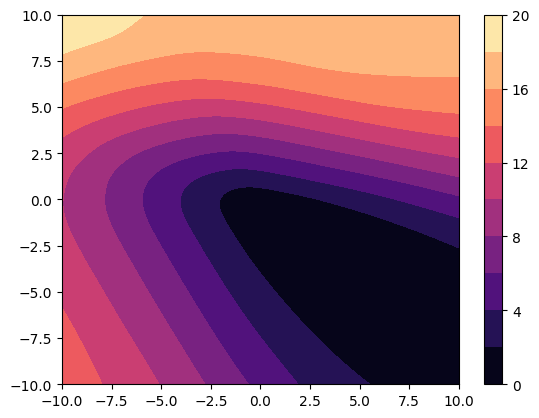

In [63]:
plt.contourf(w11,w22,L,10,cmap='magma')
plt.colorbar()

In [6]:
def initialization(X):
    W=np.random.randn(X.shape[1],1)
    b=np.random.randn(1)
    return (W,b)

In [44]:
def model(X,W,b):
    z=X.dot(W)+b
    return 1/(1+np.exp(-z))

In [45]:
def log_loss(A,y):
    epsilon=1e-15
    return 1/len(y) * np.sum(-y*np.log(A+epsilon)-(1-y)*np.log(1-A + epsilon))

In [10]:
def gradient(A,X,y):
    dW=1/len(y)*X.T.dot(A-y)
    db=1/len(y)*np.sum(A-y)
    return (dW,db)

In [11]:
def update(W,b,dW,db,learning_rate):
    W=W-learning_rate*dW
    b=b-learning_rate*db
    return (W,b)

In [72]:
def predict(X,W,b):
    A=model(X,W,b)
    return A>=0.5

In [87]:
from sklearn.metrics import accuracy_score
from tqdm import tqdm

In [94]:
def artificial_neuron(X_train,y_train,X_test,y_test,learning_rate=0.01,n_iter=100):
    W,b=initialization(X_train)
    train_loss=[]
    train_acc=[]

    test_loss=[]
    test_acc=[]
    for i in tqdm(range(n_iter)):
        A=model(X_train,W,b)
        if i%10==0:
            train_loss.append(log_loss(A,y_train))
            train_acc.append(accuracy_score(y_train,predict(X_train,W,b)))

            A_test=model(X_test,W,b)
            test_loss.append(log_loss(A_test,y_test))
            test_acc.append(accuracy_score(y_test,predict(X_test,W,b)))
        dW,db=gradient(A,X_train,y_train)
        W,b=update(W,b,dW,db,learning_rate)

    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    plt.plot(train_loss,label='train loss')
    plt.plot(test_loss,label='test loss')
    plt.legend()
    plt.subplot(1,2,2)
    plt.plot(train_acc,label='train acc')
    plt.plot(test_acc,label='test acc')
    plt.legend()
    plt.show()
    return (W,b)

0.92


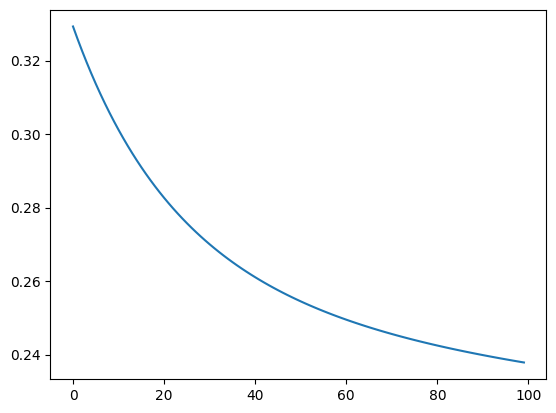

In [25]:
w,b=artificial_neuron(X,y)

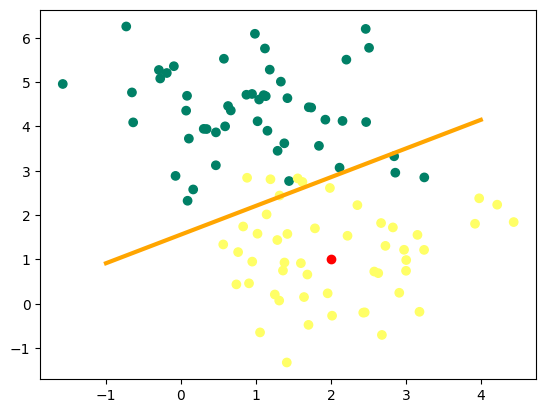

[[0.84005582]]


array([[ True]])

In [31]:
new_point=np.array([[2,1]])
x0=np.linspace(-1,4,100)
x1=(-w[0] * x0 -b)/w[1]


plt.scatter(X[:,0],X[:,1],cmap='summer',c=y)
plt.scatter(new_point[:,0],new_point[:,1],c='red')
plt.plot(x0,x1,c='orange',lw=3)
plt.show()
predict(new_point,w,b)

Cat/dog

In [33]:
from utilities import *

In [34]:
X_train, y_train, X_test, y_test = load_data()

In [35]:
print(X_train.shape)
print(y_train.shape)
print(np.unique(y_train, return_counts=True))

(1000, 64, 64)
(1000, 1)
(array([0., 1.]), array([500, 500], dtype=int64))


In [36]:
print(X_test.shape)
print(y_test.shape)
print(np.unique(y_test, return_counts=True))

(200, 64, 64)
(200, 1)
(array([0., 1.]), array([100, 100], dtype=int64))


In [64]:
X_train_reshape=X_train.reshape(X_train.shape[0],-1)/X_train.max()
X_train_reshape.shape

(1000, 4096)

In [65]:
X_test_reshape=X_test.reshape(X_test.shape[0],-1)/X_test.max()
X_test_reshape.shape

(200, 4096)

100%|██████████| 10000/10000 [00:44<00:00, 227.17it/s]


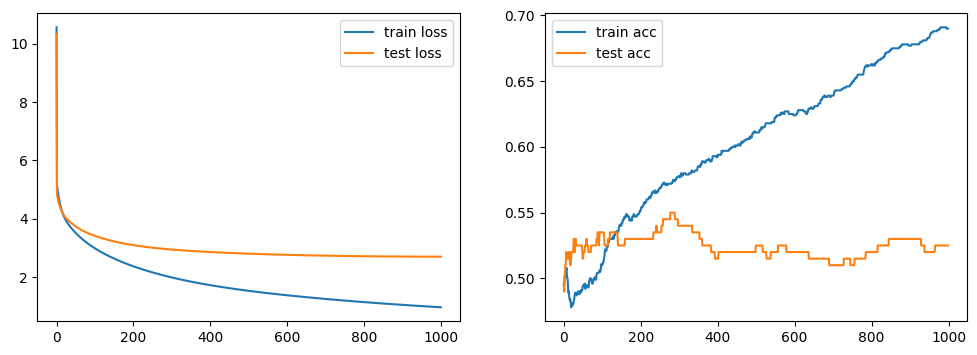

In [96]:
W,b=artificial_neuron(X_train_reshape,y_train,X_test_reshape,y_test,learning_rate=0.01,n_iter=10000)